In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Cost of House

In [3]:
Prop_val = 200000

## Determine Initial investment

In [27]:
Down       = 0.2 * Prop_val # minimum 20% to avoid mortgage insurance
Loan       = Prop_val - Down
Closing    = 3000 # 3-5% 
Rehab      = 7000
Other      = 0
Investment = Down + Closing + Rehab + Other

## Determine Income

In [28]:
Rent    = 2000
Vacancy = 0.1 # percentage of time lot is vacant
Rent_adj= Rent - (Rent * Vacancy)
Laundry = 0
Storage = 0
Misc    = 0
Income  = Rent_adj + Laundry + Storage + Misc

## Determine Expenses

In [29]:
# Tax taken from https://smartasset.com/taxes/minnesota-property-tax-calculator
# Tax = 0.946 % in St. Louis county
Tax       = ((0.946 / 100) * Prop_val) / 12
Insurance = 100  # estimated at 0.05% based off of deeper pockets' calculations
# Utilities are 0 assuming the tenants pay for them.
Water     = 0
Electric  = 0
Sewer     = 0
Water     = 0
Gas       = 0
Garbage   = 0
Utilities = Water + Electric + Sewer + Water + Gas + Garbage
HOA       = 0 # Home owner's association fee
Lawn_snow = 0
Repairs   = 100
Capex     = 100
Manager   = 100
year_rate = 4.34 / 100
# grab current mortgage rate
rate      = year_rate / 12
years     = 30
monthes   = years * 12
Mortgage  = Loan * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1)
Expense   = Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + Mortgage

## Determine Cash Flow

In [30]:
Flow_month = Income - Expense
Flow_year  = Flow_month * 12

## Determine Yearly Cash on Cash ROI (CoC)

In [31]:
CoC_ROI = (Flow_year / Investment) * 100
print(str(CoC_ROI) + '%')

10.722636026743377%


# Float Rent, and Down to determine the CoC_ROI for multiple values

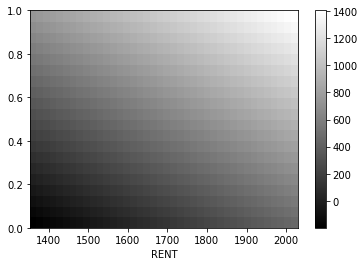

In [32]:
# Generate two 1-D arrays: rents, downs
rents     = np.linspace(Expense, Expense * 1.5, 41)
downs     = np.linspace(0,1, 21)

loans     =  Prop_val - (downs * Prop_val)

mortgages = loans * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1)
Expenses   = Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + mortgages

# Generate 2-D arrays from u and v: X, Y
RENT,DOWN = np.meshgrid(rents,downs)


FLOW = RENT - (Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + ((Prop_val - (DOWN * Prop_val)) * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1)))

# Display the resulting image with pcolor()
plt.xlabel('RENT')
plt.pcolor(RENT, DOWN, FLOW, cmap = 'gray')
plt.colorbar()
plt.axis('tight')
plt.show()

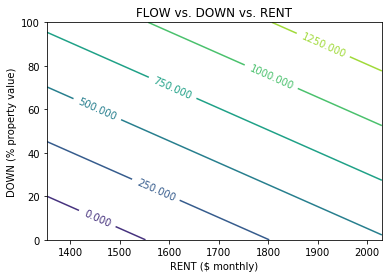

In [33]:
fig, ax = plt.subplots()
CS = ax.contour(RENT, DOWN * 100, FLOW)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('FLOW vs. DOWN vs. RENT')
plt.xlabel('RENT ($ monthly)')
plt.ylabel('DOWN (% property value)')
plt.show()

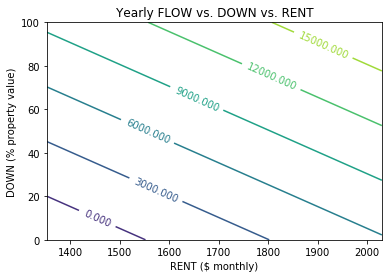

In [34]:
fig, ax = plt.subplots()
CS = ax.contour(RENT, DOWN * 100, FLOW * 12)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Yearly FLOW vs. DOWN vs. RENT')
plt.xlabel('RENT ($ monthly)')
plt.ylabel('DOWN (% property value)')
plt.show()

### CAN I FIND THE GRADIENT OF THIS FUNCTION IN ORDER TO MAXIMIZE THE DOWN TO RENT RATIO?????? #####

## CoC ROI's

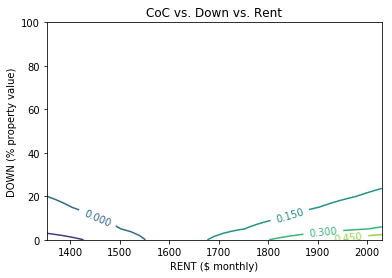

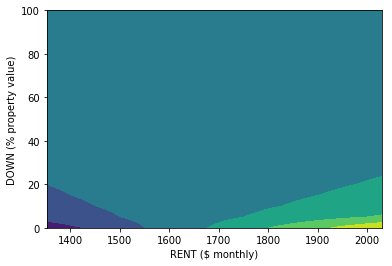

In [222]:
CoC = ((RENT - (Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + ((Prop_val - (DOWN * Prop_val)) * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1))))* 12) / ((DOWN * Prop_val) + Closing + Rehab + Other)
fig, ax = plt.subplots()
CS = ax.contour(RENT, DOWN * 100, CoC)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('CoC vs. Down vs. Rent')
plt.xlabel('RENT ($ monthly)')
plt.ylabel('DOWN (% property value)')
plt.show()
# I SHOULD FIND THE GRADIENT SO I CAN MATCH THE BEST DOWN PAYMENT TO AN APPROPRIATE RENT ###

CoC = ((RENT - (Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + ((Prop_val - (DOWN * Prop_val)) * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1))))* 12) / ((DOWN * Prop_val) + Closing + Rehab + Other)

plt.contourf(RENT, DOWN * 100, CoC)
ax.set_title('CoC vs. Down vs. Rent')
plt.xlabel('RENT ($ monthly)')
plt.ylabel('DOWN (% property value)')
plt.show()
# I SHOULD FIND THE GRADIENT SO I CAN MATCH THE BEST DOWN PAYMENT TO AN APPROPRIATE RENT ###

In [36]:
# Calculate mortgage. This  was cross verified with mortgage calculators to return the same results.
Mortgage  = Loan * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1)

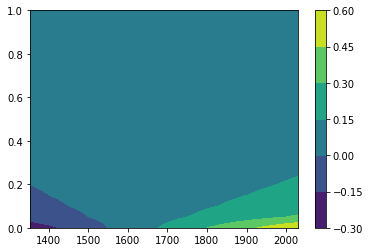

In [167]:
horizontal_stepsize = (max(rents) - min(rents)) / len(rents)
vertical_stepsize   = (max(downs) - min(rents)) / len(rents)

RENT_shift = RENT + horizontal_stepsize/2.0
DOWN_shift = RENT + vertical_stepsize/2.0

CoC_shift = ((RENT_shift - (Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + ((Prop_val - (DOWN_shift * Prop_val)) * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1))))* 12) / ((DOWN_shift * Prop_val) + Closing + Rehab + Other)

yd, xd = np.gradient(CoC_shift)

def func_to_vectorize(x, y, dx, dy, xscaling=1, yscaling= 1):
    plt.arrow(x, y, dx*xscaling, dy*yscaling, fc="k", ec="k", head_width=0.06, head_length=0.1)

vectorized_arrow_drawing = np.vectorize(func_to_vectorize)

plt.contourf(RENT, DOWN, CoC)
vectorized_arrow_drawing(RENT_shift, DOWN_shift, xd, yd, 1, 0.1)
plt.colorbar()
plt.show()

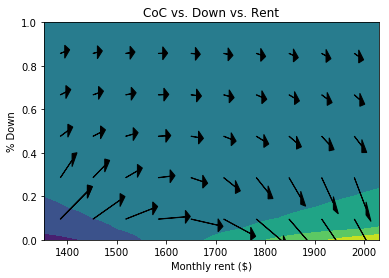

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import math
horizontal_min, horizontal_max, horizontal_stepsize = min(rents) , max(rents), (max(rents)-  min(rents)) / len(rents)
vertical_min, vertical_max, vertical_stepsize = min(downs) , max(downs), (max(downs)-  min(downs)) / len(downs)

horizontal_dist = horizontal_max-horizontal_min
vertical_dist = vertical_max-vertical_min

horizontal_stepsize = (horizontal_dist / float(math.ceil(horizontal_dist/float(horizontal_stepsize)))) *4 
vertical_stepsize = (vertical_dist / float(math.ceil(vertical_dist/float(vertical_stepsize)))) * 4

xv, yv = np.meshgrid(np.arange(horizontal_min, horizontal_max, horizontal_stepsize),
                     np.arange(vertical_min, vertical_max, vertical_stepsize))
xv+=horizontal_stepsize/2.0
yv+=vertical_stepsize/2.0

result_matrix = ((xv - (Tax + Insurance + Utilities + HOA + Lawn_snow + Repairs + Capex + Manager + ((Prop_val - (yv * Prop_val)) * (rate * (1 + rate) ** monthes) / ((1 + rate ) ** monthes -1))))* 12) / ((yv * Prop_val) + Closing + Rehab + Other)

yd, xd = np.gradient(result_matrix)

def func_to_vectorize(x, y, dx, dy, xscaling=0.01, yscaling=0.01):
    plt.arrow(x, y, dx*xscaling, dy*yscaling, fc="k", ec="k", head_width=0.06, head_length=10)

vectorized_arrow_drawing = np.vectorize(func_to_vectorize)

plt.contourf(RENT, DOWN, CoC)
vectorized_arrow_drawing(xv, yv, xd, yd, 2000, 2.5)
plt.title('CoC vs. Down vs. Rent')
plt.xlabel('Monthly rent ($)')
plt.ylabel('% Down')
plt.show()